In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt

health_path = r'C:\Users\alexf\OneDrive\Documents\Projects\Apple Health Exports\raw data\AppleHealth-2025-05-24\apple_health_export\export.xml'

# create element tree object
tree = ET.parse(health_path) 
# for every health record, extract the attributes
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]



In [ ]:
record_data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    record_data[col] = pd.to_datetime(record_data[col])

# value is numeric, NaN if fails
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
record_data['value'] = record_data['value'].fillna(1.0)

# shorter observation names
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')
record_data.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
798787,BloodPressureDiastolic,iHealth,11,mmHg,2025-05-23 20:35:23-04:00,2025-05-23 20:34:47-04:00,2025-05-23 20:34:47-04:00,83.0,NaN
798788,BloodPressureDiastolic,iHealth,11,mmHg,2025-05-23 20:44:04-04:00,2025-05-23 20:43:09-04:00,2025-05-23 20:43:09-04:00,81.0,NaN
798789,BloodPressureSystolic,iHealth,11,mmHg,2025-05-23 20:44:04-04:00,2025-05-23 20:43:09-04:00,2025-05-23 20:43:09-04:00,137.0,NaN
798790,BloodPressureSystolic,iHealth,11,mmHg,2025-05-24 14:56:17-04:00,2025-05-24 14:55:53-04:00,2025-05-24 14:55:53-04:00,154.0,NaN
798791,BloodPressureDiastolic,iHealth,11,mmHg,2025-05-24 14:56:17-04:00,2025-05-24 14:55:53-04:00,2025-05-24 14:55:53-04:00,78.0,NaN


In [ ]:
record_data['type'].unique()

array(['DietaryWater', 'BodyMassIndex', 'Height', 'BodyMass', 'HeartRate',
       'BloodPressureSystolic', 'BloodPressureDiastolic',
       'RespiratoryRate', 'BodyFatPercentage', 'LeanBodyMass',
       'StepCount', 'DistanceWalkingRunning', 'BasalEnergyBurned',
       'ActiveEnergyBurned', 'FlightsClimbed', 'DietaryFatTotal',
       'DietaryFatPolyunsaturated', 'DietaryFatMonounsaturated',
       'DietaryFatSaturated', 'DietaryCholesterol', 'DietarySodium',
       'DietaryCarbohydrates', 'DietaryFiber', 'DietarySugar',
       'DietaryEnergyConsumed', 'DietaryProtein', 'DietaryVitaminC',
       'DietaryCalcium', 'DietaryIron', 'DietaryPotassium',
       'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',
       'WalkingSpeed', 'WalkingStepLength', 'WalkingAsymmetryPercentage',
       'HKDataTypeSleepDurationGoal', 'AppleWalkingSteadiness',
       'SleepAnalysis', 'MindfulSession'], dtype=object)

In [ ]:
# Subset for 2024 only
subset_data = record_data[
    (record_data['startDate'] >= '2025-03-01') &
    (record_data['startDate'] <= '2025-04-30')
]

# # Filter only record types of interest
# type_values_to_analyze = ['BodyMass', 'HeartRate',
#        'RespiratoryRate', 'BodyFatPercentage', 'LeanBodyMass',
#        'StepCount', 'DistanceWalkingRunning', 'BasalEnergyBurned',
#        'ActiveEnergyBurned', 'FlightsClimbed', 
#        'DietaryEnergyConsumed', 'WalkingDoubleSupportPercentage',
#        'WalkingSpeed', 'WalkingStepLength', 'WalkingAsymmetryPercentage',
#        'HKDataTypeSleepDurationGoal', 'AppleWalkingSteadiness',
#        'SleepAnalysis', 'MindfulSession']

# subset_data = subset_data[subset_data['type'].isin(type_values_to_analyze)]

# Convert 'startDate' to datetime
subset_data['startDate'] = pd.to_datetime(subset_data['startDate'])


C:\Users\alexf\AppData\Local\Temp\ipykernel_37296\1510404318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['creationDate'] = pd.to_datetime(subset_data['creationDate'])


In [ ]:
subset_data['sourceName'].unique()

array(['Renpho Health', 'MyFitnessPal', 'Oura', 'CASIO WATCHES',
       'Alex’s iPhone', 'Runkeeper', 'TM'], dtype=object)

In [ ]:
subset_data['startDate'].min()

Timestamp('2025-03-01 00:01:14-0400', tz='UTC-04:00')

In [ ]:
subset_data['sourceName'] = subset_data['sourceName'].replace('Renpho Health', 'Renpho')
subset_data['sourceName'] = subset_data['sourceName'].replace('Alex’s iPhone', 'iPhone')

C:\Users\alexf\AppData\Local\Temp\ipykernel_37296\2023864367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['sourceName'] = subset_data['sourceName'].replace('Renpho Health', 'Renpho')
C:\Users\alexf\AppData\Local\Temp\ipykernel_37296\2023864367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['sourceName'] = subset_data['sourceName'].replace('Alex’s iPhone', 'iPhone')


In [ ]:
subset_data.drop_duplicates(subset=['type', 'sourceName'])[['type', 'sourceName']]

,type,sourceName
1251,BodyMassIndex,Renpho
1582,BodyMass,Renpho
1585,BodyMass,MyFitnessPal
201328,HeartRate,Oura
211895,HeartRate,CASIO WATCHES
264032,RespiratoryRate,Oura
264314,BodyFatPercentage,Renpho
264397,LeanBodyMass,Renpho
345810,StepCount,iPhone
345813,StepCount,Oura


C:\Users\alexf\AppData\Local\Temp\ipykernel_37296\2969117591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_bf_data['value'] = body_bf_data['value'] * 100


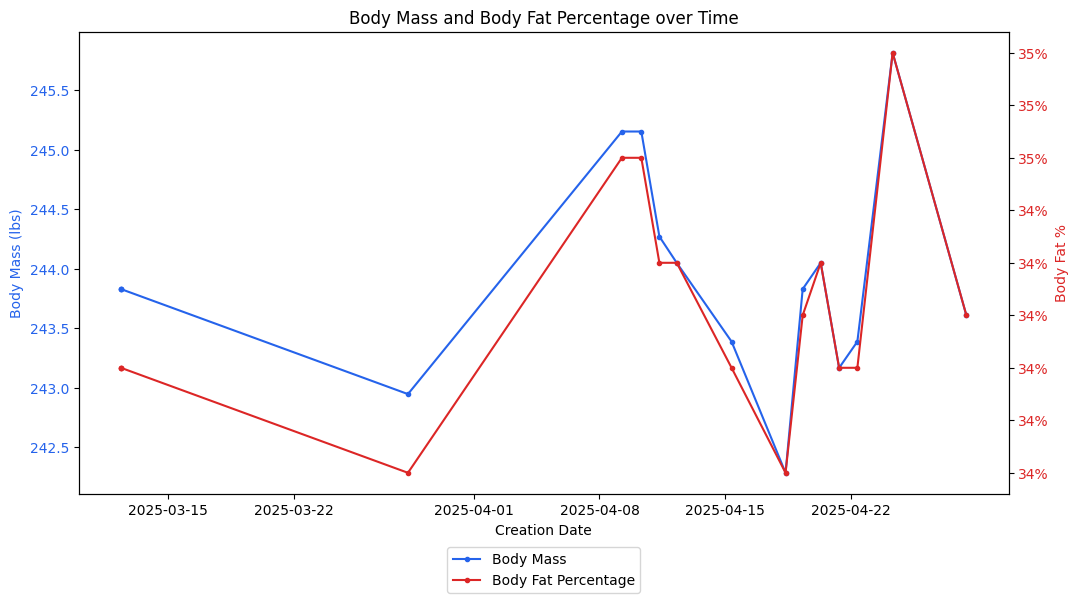

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Display Body Mass and Body Fat Percentage over time
body_mass_data = subset_data[subset_data['type'] == 'BodyMass']
body_bf_data = subset_data[subset_data['type'] == 'BodyFatPercentage']
body_bf_data['value'] = body_bf_data['value'] * 100

body_mass_data = body_mass_data[body_mass_data['sourceName'] == 'Renpho']

# Set the figure size
fig, ax1 = plt.figure(figsize=(12, 6)), plt.gca()  # Width: 12 inches, Height: 6 inches

# Create line graph for BodyMass on the primary y-axis
ax1.plot(body_mass_data['startDate'], body_mass_data['value'], marker='.', label='Body Mass', color='#2563eb')
ax1.set_xlabel('Creation Date')
ax1.set_ylabel('Body Mass (lbs)', color='#2563eb')
ax1.tick_params(axis='y', labelcolor='#2563eb')

# Create a secondary y-axis for BodyFatPercentage
ax2 = ax1.twinx()
ax2.plot(body_bf_data['startDate'], body_bf_data['value'], marker='.', label='Body Fat Percentage', color='#dc2626')
ax2.set_ylabel('Body Fat %', color='#dc2626')
ax2.tick_params(axis='y', labelcolor='#dc2626')

# Format the secondary y-axis labels as percentages
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))

# Add title
plt.title('Body Mass and Body Fat Percentage over Time')
plt.xticks(rotation=45)

# Combine legends from both axes and place it below the x-axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.1))

# Show plot
plt.show()

In [ ]:
subset_data[subset_data['sourceName'] == 'Oura']['type'].unique()

array(['HeartRate', 'RespiratoryRate', 'StepCount', 'ActiveEnergyBurned',
       'SleepAnalysis'], dtype=object)

In [ ]:
subset_data[(subset_data['sourceName'] == 'Oura') & (subset_data['type'] == 'ActiveEnergyBurned')]

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
578853,ActiveEnergyBurned,Oura,2502051542,Cal,2025-03-01 05:06:23-04:00,2025-02-28 05:41:00-04:00,2025-02-28 05:41:00-04:00,0.602,NaN
578854,ActiveEnergyBurned,Oura,2502051542,Cal,2025-03-01 05:06:23-04:00,2025-02-28 05:43:00-04:00,2025-02-28 05:43:00-04:00,2.501,NaN
578855,ActiveEnergyBurned,Oura,2502051542,Cal,2025-03-01 05:06:23-04:00,2025-02-28 09:07:00-04:00,2025-02-28 09:07:00-04:00,1.343,NaN
578856,ActiveEnergyBurned,Oura,2502051542,Cal,2025-03-01 05:06:23-04:00,2025-02-28 09:08:00-04:00,2025-02-28 09:08:00-04:00,0.602,NaN
578857,ActiveEnergyBurned,Oura,2502051542,Cal,2025-03-01 05:06:23-04:00,2025-02-28 09:20:00-04:00,2025-02-28 09:20:00-04:00,2.686,NaN
...,...,...,...,...,...,...,...,...,...
593755,ActiveEnergyBurned,Oura,2504221109,Cal,2025-04-29 07:51:11-04:00,2025-04-29 00:55:00-04:00,2025-04-29 00:55:00-04:00,0.142,NaN
593756,ActiveEnergyBurned,Oura,2504221109,Cal,2025-04-29 07:51:11-04:00,2025-04-29 03:25:00-04:00,2025-04-29 03:25:00-04:00,0.285,NaN
593757,ActiveEnergyBurned,Oura,2504221109,Cal,2025-04-29 07:51:11-04:00,2025-04-29 03:26:00-04:00,2025-04-29 03:26:00-04:00,0.285,NaN
593758,ActiveEnergyBurned,Oura,2504221109,Cal,2025-04-29 07:51:11-04:00,2025-04-29 03:28:00-04:00,2025-04-29 03:28:00-04:00,2.277,NaN


C:\Users\alexf\AppData\Local\Temp\ipykernel_37296\697328171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oura_energy_burned['creationDate'] = pd.to_datetime(oura_energy_burned['creationDate'])


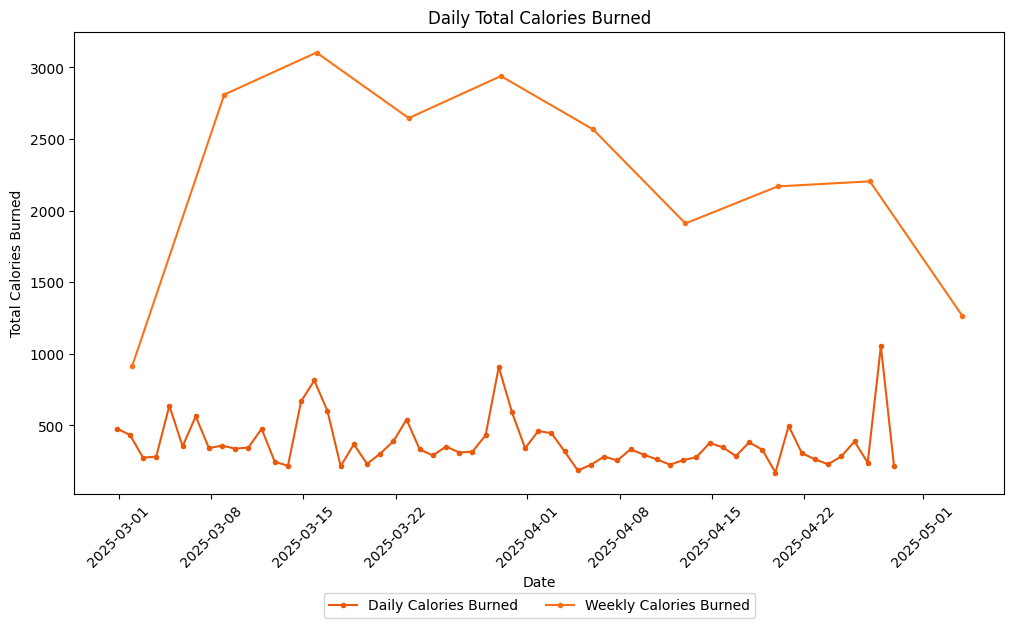

In [ ]:
# Filter for 'sourceName'='Oura' and 'type'='ActiveEnergyBurned'
oura_energy_burned = subset_data[(subset_data['sourceName'] == 'Oura') & (subset_data['type'] == 'ActiveEnergyBurned')]

# Convert 'startDate' to datetime
oura_energy_burned['startDate'] = pd.to_datetime(oura_energy_burned['startDate'])

# Aggregate data by day
daily_totals = oura_energy_burned.groupby(oura_energy_burned['startDate'].dt.date)['value'].sum().reset_index()

# Rename columns for clarity
daily_totals.columns = ['Date', 'TotalCaloriesBurned']

# Set 'startDate' as the index for resampling
oura_energy_burned.set_index('startDate', inplace=True)

# Resample data by week and sum the 'value' column to get weekly totals
weekly_totals = oura_energy_burned['value'].resample('W').sum().reset_index()

# Rename columns for clarity
weekly_totals.columns = ['Week', 'TotalCaloriesBurned']

# Plot the daily totals
plt.figure(figsize=(12, 6))
plt.plot(daily_totals['Date'], daily_totals['TotalCaloriesBurned'], marker='.', color='#ea580c')
plt.plot(weekly_totals['Week'], weekly_totals['TotalCaloriesBurned'], marker='.', color='#f97316')
plt.xlabel('Date')
plt.ylabel('Total Calories Burned')
plt.title('Daily Total Calories Burned')
plt.xticks(rotation=45)

# Add a legend
plt.legend(['Daily Calories Burned', 'Weekly Calories Burned'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show plot
plt.show()

C:\Users\alexf\AppData\Local\Temp\ipykernel_37296\2634946248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfp_calories['creationDate'] = pd.to_datetime(mfp_calories['creationDate'])


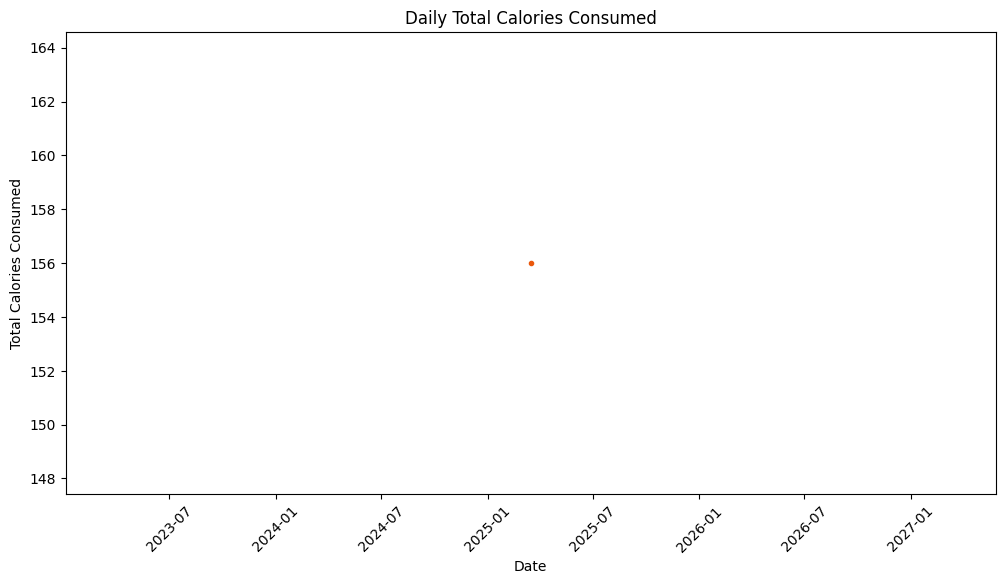

In [ ]:
# Filter for 'sourceName'='Oura' and 'type'='ActiveEnergyBurned'
mfp_calories = subset_data[subset_data['type'] == 'DietaryEnergyConsumed']

# Convert 'startDate' to datetime
mfp_calories['startDate'] = pd.to_datetime(mfp_calories['startDate'])
# Aggregate data by day
daily_totals = mfp_calories.groupby(mfp_calories['startDate'].dt.date)['value'].sum().reset_index()

# Rename columns for clarity
daily_totals.columns = ['Date', 'TotalCaloriesConsumed']

# Plot the daily totals
plt.figure(figsize=(12, 6))
plt.plot(daily_totals['Date'], daily_totals['TotalCaloriesConsumed'], marker='.', color='#ea580c')
plt.xlabel('Date')
plt.ylabel('Total Calories Consumed')
plt.title('Daily Total Calories Consumed')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
subset_data.to_csv(r'processed data\apple_data_subset.csv', index=False)